In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df = dataset.copy()

# EDA

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


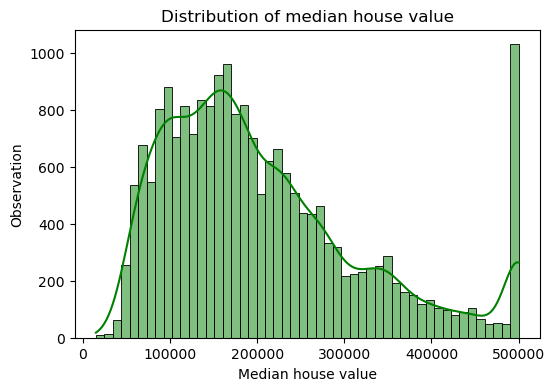

In [4]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=50, color='green', alpha=0.5, kde=True)
plt.ylabel('Observation')
plt.xlabel('Median house value')
plt.title('Distribution of median house value')

plt.show()

**It is right skewed**

# Preparing the dataset

In [5]:
df = df[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])].drop('ocean_proximity', axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# Q1-There's one feature with missing values. What is it?

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Q2-What's the median (50% percentile) for variable 'population'?

In [7]:
df.population.median()

1195.0

# Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.



In [8]:
np.random.seed(42)
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_validate = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [9]:
y_train = np.log1p(df_train.median_house_value.values)
y_validate = np.log1p(df_validate.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train["median_house_value"]
del df_validate["median_house_value"]
del df_test["median_house_value"]

In [10]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
20157,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
20005,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
6691,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
3470,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


# Q3


* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [12]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def prepare_X_zero(df): # for option with 0
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def prepare_X_mean(df): # for option with mean
    df_num = df
    df_num = df_num.fillna(value = df_train.total_bedrooms.mean())
    X = df_num.values
    return X

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [13]:
# Option with 0

X_train = prepare_X_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_validate = prepare_X_zero(df_validate)
y_pred = w0 + X_validate.dot(w)

round(rmse(y_validate, y_pred), 2)


0.34

In [14]:
# Option with mean

X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_validate = prepare_X_mean(df_validate)
y_pred = w0 + X_validate.dot(w)

round(rmse(y_validate, y_pred), 2)

0.34

# Q4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

In [15]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in r_list:
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X_zero(df_validate)
    y_pred = w0 + X_val.dot(w)
    print(f"{r} produces {rmse(y_validate, y_pred)}")

0 produces 0.34084790341753624
1e-06 produces 0.34084790618010546
0.0001 produces 0.34084818004973644
0.001 produces 0.3408506921870432
0.01 produces 0.3408779300468973
0.1 produces 0.34128620419889505
1 produces 0.34489583276457697
5 produces 0.3477398070480591
10 produces 0.3483149833520234


# Q5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [17]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seed_rmse = []

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


for seed in seeds:

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_validate = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    y_train = np.log1p(df_train.median_house_value.values)
    y_validate = np.log1p(df_validate.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train["median_house_value"]
    del df_validate["median_house_value"]
    del df_test["median_house_value"]

    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_validate = prepare_X_zero(df_validate)
    y_pred = w0 + X_validate.dot(w)

    seed_rmse.append(rmse(y_validate, y_pred))

print(seed_rmse)
print(round(np.std(seed_rmse), 3))

[0.33773871600834, 0.3377999353661282, 0.33842870067685615, 0.33200494683081555, 0.3394451862556629, 0.34338197052599967, 0.3385330211773903, 0.3468747697289676, 0.3512736865957031, 0.33415582665211396]
0.005


# Q6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [18]:
n = len(df)
n_test = int(n * 0.2)
n_train = n - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:]]

y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train["median_house_value"]
del df_test["median_house_value"]

X_train = df_train.fillna(0)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.001)

X_test = df_test.fillna(0)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

0.3349899336607714